#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 29 de novembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_29nov2020.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(1394380, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394380 entries, 0 to 1394379
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1394380 non-null  object 
 1   estado                  1394101 non-null  object 
 2   municipio               1381360 non-null  object 
 3   coduf                   1394380 non-null  int64  
 4   codmun                  1386568 non-null  float64
 5   codRegiaoSaude          1381360 non-null  float64
 6   nomeRegiaoSaude         1381360 non-null  object 
 7   data                    1394380 non-null  object 
 8   semanaEpi               1394380 non-null  int64  
 9   populacaoTCU2019        1389172 non-null  float64
 10  casosAcumulado          1394380 non-null  int64  
 11  casosNovos              1394380 non-null  int64  
 12  obitosAcumulado         1394380 non-null  int64  
 13  obitosNovos             1394380 non-null  int64  
 14  Re

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
250590,Nordeste,CE,Ipueiras,23,230590.0,23015.0,15ª REGIAO CRATEUS,2020-11-16,47,38166.0,1527,0,32,0,NaN,NaN,0.0
1305789,Centro-Oeste,MT,Colíder,51,510320.0,51010.0,NORTE MATOGROSSENSE,2020-10-06,41,33438.0,1415,9,30,0,NaN,NaN,0.0
1378737,Centro-Oeste,GO,Piranhas,52,521720.0,52009.0,OESTE I,2020-11-11,46,10385.0,262,0,16,0,NaN,NaN,0.0
425954,Nordeste,AL,Dois Riachos,27,270250.0,27009.0,9ª REGIAO DE SAUDE,2020-04-10,15,11075.0,0,0,0,0,NaN,NaN,0.0
875414,Sudeste,SP,Herculândia,35,351900.0,35095.0,TUPA,2020-07-03,27,9526.0,25,0,2,0,NaN,NaN,0.0
868490,Sudeste,SP,Franco da Rocha,35,351640.0,35012.0,FRANCO DA ROCHA,2020-07-23,30,154489.0,1118,39,85,0,NaN,NaN,1.0
235768,Nordeste,CE,Barbalha,23,230190.0,23021.0,21ª REGIAO JUAZEIRO DO NORTE,2020-05-10,20,60781.0,8,0,0,0,NaN,NaN,0.0
1143660,Sul,SC,São Lourenço do Oeste,42,421690.0,42003.0,XANXERE,2020-04-04,14,24076.0,1,0,0,0,NaN,NaN,0.0
1312624,Centro-Oeste,MT,Juruena,51,510517.0,51008.0,NOROESTE MATOGROSSENSE,2020-06-19,25,15865.0,1,0,0,0,NaN,NaN,0.0
1012815,Sul,PR,Godoy Moreira,41,410855.0,41022.0,22ª RS IVAIPORA,2020-07-12,29,2946.0,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    42076
RJ    22561
MG    10031
CE     9607
PE     9030
BA     8247
PA     6907
RS     6776
GO     6349
PR     6122
AM     4885
MA     4287
ES     4252
MT     4078
DF     3925
SC     3721
PB     3292
RN     2686
PI     2622
AL     2336
SE     2304
MS     1766
RO     1555
TO     1162
AP      806
RR      727
AC      723
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

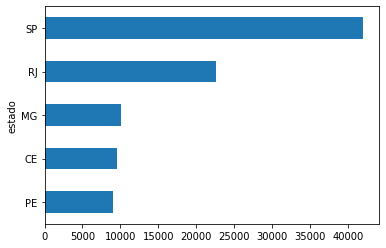

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

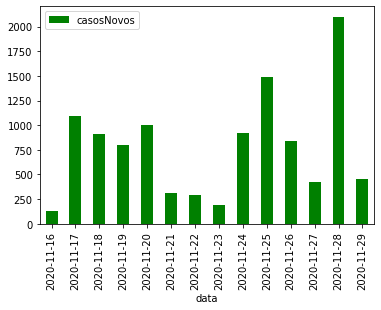

In [8]:
rj = df.query('municipio == "Rio de Janeiro"')
rj.tail(14).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

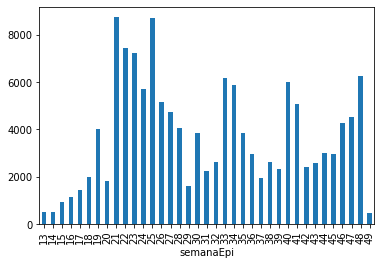

In [9]:
rj.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

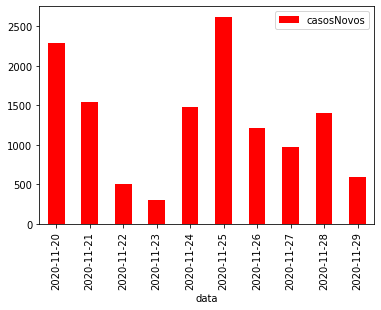

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

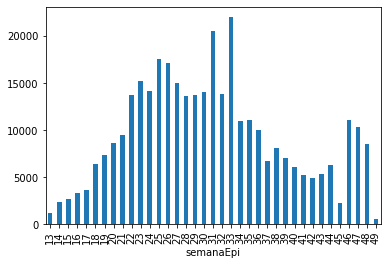

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')